In [97]:
import pandas as pd

In [98]:
train_data=pd.read_csv("/content/Google_Stock_Price_Train.csv")
print(train_data.head())
train_data.info()

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [99]:
test_data=pd.read_csv("/content/Google_Stock_Price_Test.csv")
print(test_data.head())
test_data.info()

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [100]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

print(train_data.shape)
print(test_data.shape)



Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
(1258, 6)
(20, 6)


In [101]:
#data cleaning

#droping null values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
print(train_data.shape)
print(test_data.shape)
#there are no null values in both training and testing data


#date data type
if 'Date' in train_data.columns:

  train_data['Date']=pd.to_datetime(train_data['Date'])
  test_data['Date']=pd.to_datetime(test_data['Date'])



(1258, 6)
(20, 6)


In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
#Data Normalization

column_features=['Open','High','Low','Close','Volume']
print(train_data[column_features].dtypes)
print(test_data[column_features].dtypes)


train_data['Close']=pd.to_numeric(train_data['Close'].str.replace(',','').astype(float))
train_data['Volume']=pd.to_numeric(train_data['Volume'].str.replace(',','').astype(float))

#test_data['Close']=test_data['Close'].str.replace(',','').astype(float)
test_data['Volume']=test_data['Volume'].str.replace(',','').astype(float)

min_max=MinMaxScaler()

train_data[column_features]=min_max.fit_transform(train_data[column_features])
test_data[column_features]=min_max.transform(test_data[column_features])

#rechecking the data types
print(train_data[column_features].dtypes)
print(test_data[column_features].dtypes)


Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [104]:
print(train_data[column_features].head())
print(test_data[column_features].head())

#printing the normalized data

       Open      High       Low     Close    Volume
0  0.085814  0.096401  0.090449  0.237573  0.295258
1  0.097012  0.098344  0.098235  0.241514  0.229936
2  0.094334  0.092517  0.094086  0.228781  0.263612
3  0.091562  0.088819  0.088006  0.216419  0.216179
4  0.079842  0.076718  0.061070  0.178548  0.467797
       Open      High       Low     Close    Volume
0  0.929552  0.949484  0.944423  0.406461  0.066055
1  0.947318  0.952677  0.958365  0.407508  0.042655
2  0.943076  0.958541  0.961888  0.417320  0.053156
3  0.960153  0.983603  0.975489  0.434037  0.065370
4  0.980877  0.987469  0.995624  0.434726  0.050641


In [105]:
#Splitting the training data into trainiing and validation sets

from sklearn.model_selection import train_test_split

train_set,val_set=train_test_split(train_data,test_size=0.2,random_state=42,shuffle=False)

print(train_set.shape)
print(val_set.shape)



(1006, 6)
(252, 6)


Training model hidden size:32,learning rate:0.001,batch size:32,epochs:50
Epoch[10/50],Loss:0.0555
Epoch[20/50],Loss:0.0451
Epoch[30/50],Loss:0.0368
Epoch[40/50],Loss:0.0251
Epoch[50/50],Loss:0.0099
Validation Loss:0.0062
Training model hidden size:32,learning rate:0.001,batch size:32,epochs:100
Epoch[10/100],Loss:0.0493
Epoch[20/100],Loss:0.0326
Epoch[30/100],Loss:0.0107
Epoch[40/100],Loss:0.0046
Epoch[50/100],Loss:0.0024
Epoch[60/100],Loss:0.0023
Epoch[70/100],Loss:0.0017
Epoch[80/100],Loss:0.0016
Epoch[90/100],Loss:0.0015
Epoch[100/100],Loss:0.0014
Validation Loss:0.0009
Training model hidden size:32,learning rate:0.001,batch size:64,epochs:50
Epoch[10/50],Loss:0.0494
Epoch[20/50],Loss:0.0364
Epoch[30/50],Loss:0.0202
Epoch[40/50],Loss:0.0030
Epoch[50/50],Loss:0.0023
Validation Loss:0.0038
Training model hidden size:32,learning rate:0.001,batch size:64,epochs:100
Epoch[10/100],Loss:0.0671
Epoch[20/100],Loss:0.0643
Epoch[30/100],Loss:0.0502
Epoch[40/100],Loss:0.0412
Epoch[50/100],Loss

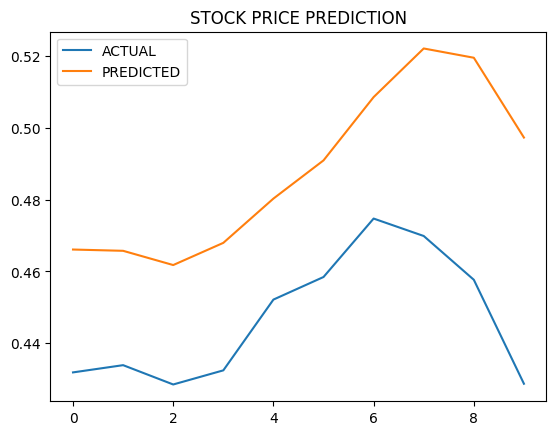

In [106]:
#Vanilla RNN implementation
#we will use pytorch (nn.RNN)

import torch
import torch.nn as nn
import numpy as np

win_length=10  #window
features=5
target=1
hidden_size=64
single_layer=1
epochs=50
learning_rate=0.001
batch_size=64


def create_sequence(data,win_length):
  seq,targets=[],[]

   # Check if enough data points to create sequences
  if len(data) <= win_length:
    print("Error: Not enough data points to create sequences.")
    return np.array(seq), np.array(targets) # Return empty arrays if not enough data

  for i in range(len(data)-win_length):
    sequence=data[i:i + win_length]
    target=data[i +win_length-1,3]
    seq.append(sequence)
    targets.append(target)

  return np.array(seq),np.array(targets)

#data prep
train_features=train_set[column_features].values
test_features=test_data[column_features].values
val_features=val_set[column_features].values

X_train,y_train=create_sequence(train_features,win_length)
X_val,y_val=create_sequence(val_features,win_length)
X_test,y_test=create_sequence(test_features,win_length)



X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32).view(-1,1)
X_val_tensor=torch.tensor(X_val,dtype=torch.float32)
y_val_tensor=torch.tensor(y_val,dtype=torch.float32).view(-1,1)

X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
X_test_tensor=X_test_tensor.reshape(-1,win_length,features)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32).view(-1,1)


#Vanilla RNN model

class VanillaRNN(nn.Module):
  def __init__(self,input_size,hid_size,output_size,num_layers):
    super(VanillaRNN,self).__init__()
    self.rnn=nn.RNN(input_size,hid_size,num_layers,batch_first=True)
    self.fc=nn.Linear(hid_size,output_size)

  def forward(self,x):
    out,_ =self.rnn(x)

    output=self.fc(out[:,-1,:])
    return output

#hyperparameter tuning using basic grid search approach

hidden_sizes=[32,64,128]
learning_rates=[0.001,0.01]
batch_sizes=[32,64]
epochs_list=[50,100]

best_model=None
best_loss=float('inf')

for hid_size in hidden_sizes:
  for lr in learning_rates:
    for batch_size in batch_sizes:
      for epochs in epochs_list:
        print(f"Training model hidden size:{hid_size},learning rate:{lr},batch size:{batch_size},epochs:{epochs}")

        model=VanillaRNN(features,hid_size,target,single_layer)
        criterion=nn.MSELoss()
        optimizer=torch.optim.Adam(model.parameters(),lr=lr)

        for i in range(epochs):
          model.train()
          output=model(X_train_tensor)
          loss=criterion(output,y_train_tensor)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (i +1)%10==0:
            print(f"Epoch[{i+1}/{epochs}],Loss:{loss.item():.4f}")

        model.eval()
        with torch.no_grad():
          validation_output=model(X_val_tensor)
          validation_loss=criterion(validation_output,y_val_tensor)
          print(f"Validation Loss:{validation_loss.item():.4f}")

          if validation_loss<best_loss:
            best_loss=validation_loss
            best_model=model


#testing the models

model.eval()
with torch.no_grad():
  test_output=model(X_test_tensor)
  test_loss=criterion(test_output,y_test_tensor)
  print(f"Test Loss:{test_loss.item():.4f}")

#Data Visualization

import matplotlib.pyplot as plt

plt.plot(y_test_tensor.numpy(),label='ACTUAL')
plt.plot(test_output.numpy(),label='PREDICTED')
plt.title('STOCK PRICE PREDICTION')
plt.legend()
plt.show()









